<a href="https://colab.research.google.com/github/buthaina279/bank_marketing_Py/blob/main/bank_marketing_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

# Modeling preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Modeling and resampling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [ ]:
bank = pd.read_csv("bank-additional-full.csv", sep= ";")


In [ ]:
bank.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
14605,37,services,married,high.school,no,yes,no,cellular,jul,tue,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
30195,31,self-employed,single,university.degree,no,yes,no,cellular,apr,thu,383,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,yes
32796,29,admin.,single,basic.9y,no,no,no,cellular,may,mon,79,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
1234,55,admin.,married,high.school,no,no,no,telephone,may,thu,294,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
34962,59,admin.,divorced,university.degree,no,no,no,cellular,may,fri,58,1,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,no
20833,58,blue-collar,married,basic.9y,unknown,no,no,cellular,aug,wed,740,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
18734,42,entrepreneur,married,professional.course,no,yes,no,cellular,jul,thu,576,7,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
16671,34,services,married,high.school,no,no,no,telephone,jul,wed,248,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
1741,32,admin.,divorced,high.school,no,yes,no,telephone,may,fri,324,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
38858,38,admin.,married,high.school,no,yes,no,cellular,nov,mon,136,1,999,1,failure,-3.4,92.649,-30.1,0.714,5017.5,no


In [ ]:
bank.shape

(41188, 21)

we are going to remove "duration" because this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic


In [ ]:
del bank["duration"]

check if there is numm values 

In [ ]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

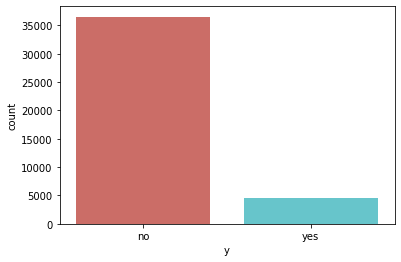

In [ ]:
sns.countplot(x = "y", data = bank, palette= "hls")
plt.show()

In [ ]:
bank.groupby("y").mean()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,
no,39.911185,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


- The average age of customers who bought the term deposit is higher than that of the customers who didn’t.

- campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.



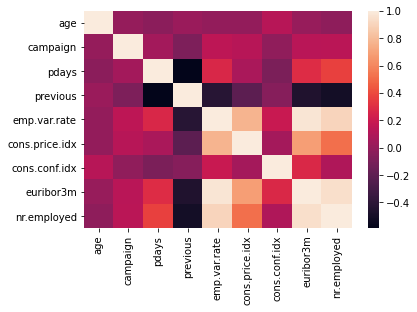

In [ ]:
sns.heatmap(bank.corr())
plt.show()

there is no missing values!

X takes all the variables without the target variable



y takes the target variable only 

In [ ]:
X = bank.iloc[:,:-1].values #all predictor columns without the target
y = bank.iloc[:,-1].values #last column (target)

Preprocessing 


https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

https://medium.com/@prtk13061992/data-preprocessing-steps-in-python-for-any-machine-learning-algorithm-2d52b57fa098

In [ ]:
#encoding the independent variables
ct = ColumnTransformer(transformers=[('encoder',
                                      OneHotEncoder(), 
                                      [1,2,3,4,5,6,7,8,9,13])], 
                                      remainder='passthrough')

X = ct.fit_transform(X)
X = np.array(X)
print(X)


[[0.0 0.0 0.0 ... -36.4 4.857 5191.0]
 [0.0 0.0 0.0 ... -36.4 4.857 5191.0]
 [0.0 0.0 0.0 ... -36.4 4.857 5191.0]
 ...
 [0.0 0.0 0.0 ... -50.8 1.028 4963.6]
 [0.0 0.0 0.0 ... -50.8 1.028 4963.6]
 [0.0 0.0 0.0 ... -50.8 1.028 4963.6]]


In [ ]:
#encoding the dependent variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 0 1 0]


devide the data into train and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=123)


feature scaling using standardization technique

In [ ]:
#feature scaling of training dataset
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

#print(neigh.predict([[1.1]]))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = neigh.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(neigh.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


Logistic regression 


https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


https://realpython.com/logistic-regression-python/



In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

In [ ]:
model.classes_

array([0, 1])

In [ ]:
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90
